# Linear Regression -California Housing Data

## Step 1 -Data Collection

In [199]:
# 1. Import Required Libraries 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse 
import matplotlib.pyplot as plt
from matplotlib import colormaps
import seaborn as sns
import pandas as pd
import numpy as np

In [200]:
#Load the California Housing Dataset
housedata = pd.read_csv("data/housing.csv")
housedata.shape

(20640, 10)

In [201]:
housedata.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Step 2 -Data Preprocessing

In [202]:
housedata.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [203]:
# Check for and drop rows with null values 
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [204]:
# Check the shape of the DataFrame
housedata.shape

(20640, 10)

In [205]:
# Drop all null values 
housedata = housedata.dropna()
len(housedata)

20433

In [206]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [207]:
housedata.shape

(20433, 10)

In [208]:
# Check the number of occurances of each category for ocean proximity
housedata['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [209]:
# Change categorical features to Binary values (1 or 0) 
ocean = pd.get_dummies(housedata['ocean_proximity'], dtype=int)
ocean.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [210]:
# Add the ocean_proximity features to the housedata set
housedata = pd.concat([housedata, ocean], axis=1)
housedata.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [211]:
housedata.shape

(20433, 15)

In [212]:
# Drop ocean_proximity 
housing = housedata.drop('ocean_proximity', axis=1)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [213]:
housing.shape

(20433, 14)

## Step 3 -Feature Engineering and Exploration

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

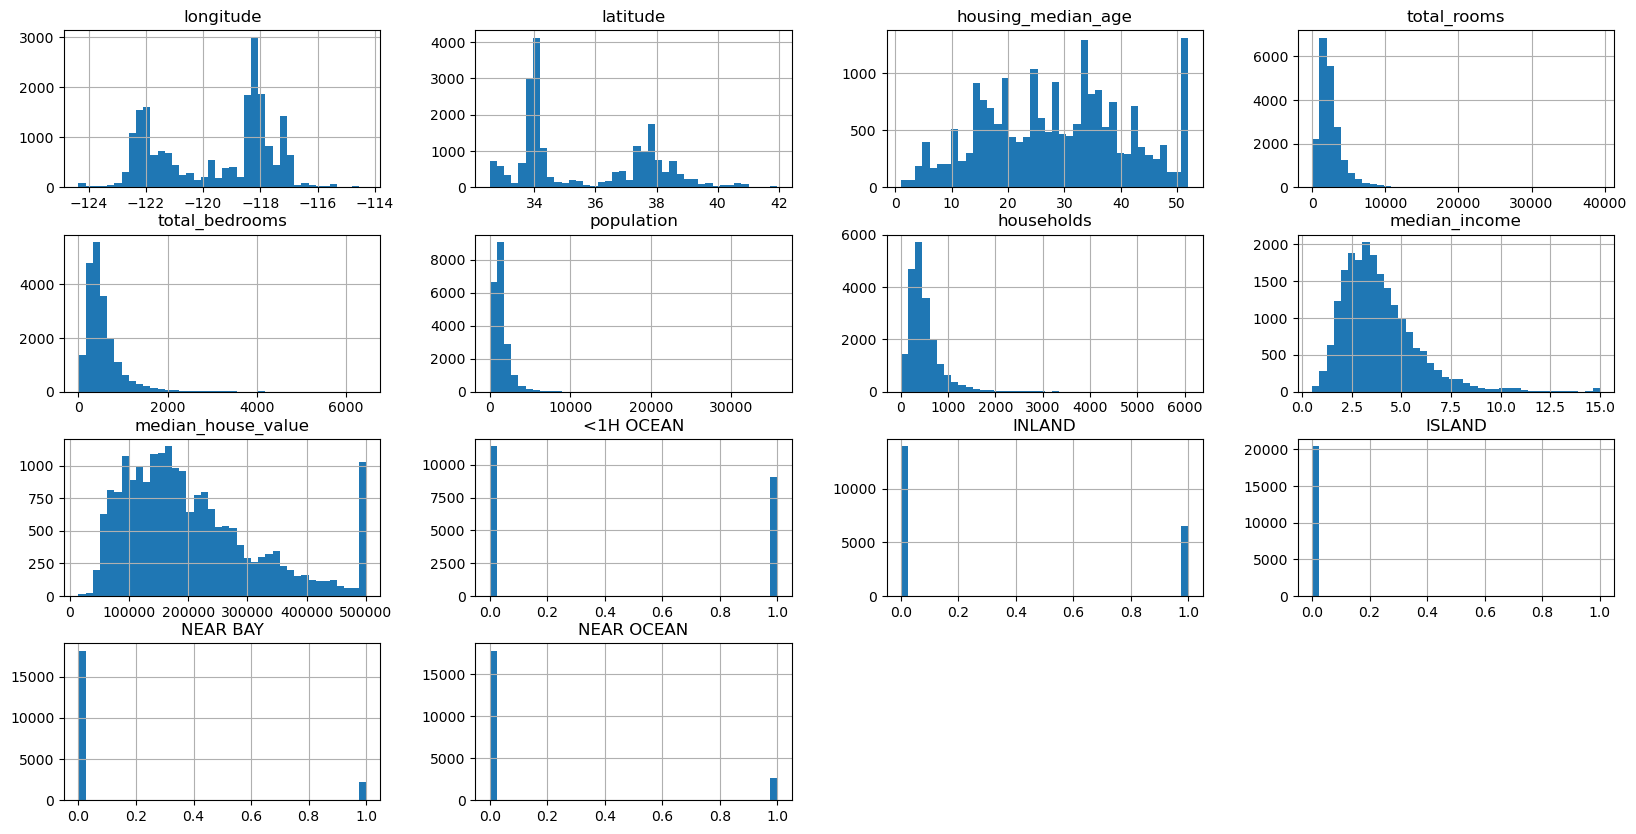

In [214]:
# Checking the distribution for outliers and skewed data

housing.hist(bins=40, figsize = (20,10))

In [239]:
# Some features are skewed
# All houses with a price above 500,000 are given the value 500,000 (Threshold)


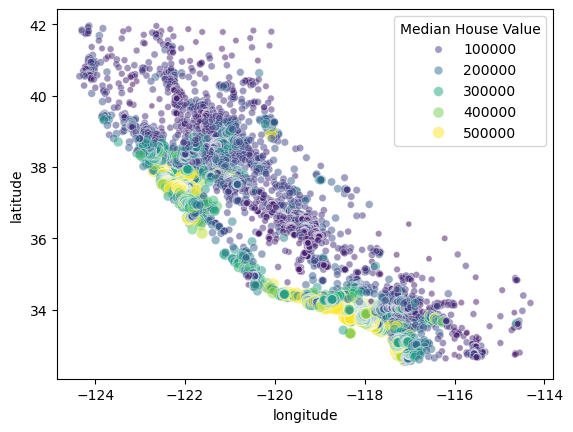

In [216]:

sns.scatterplot(
    data=housing,
    x="longitude",
    y="latitude",
    size="median_house_value",
    hue="median_house_value",
    palette="viridis",
    alpha=0.5,)
plt.legend(title="Median House Value")


In [217]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64

<Axes: >

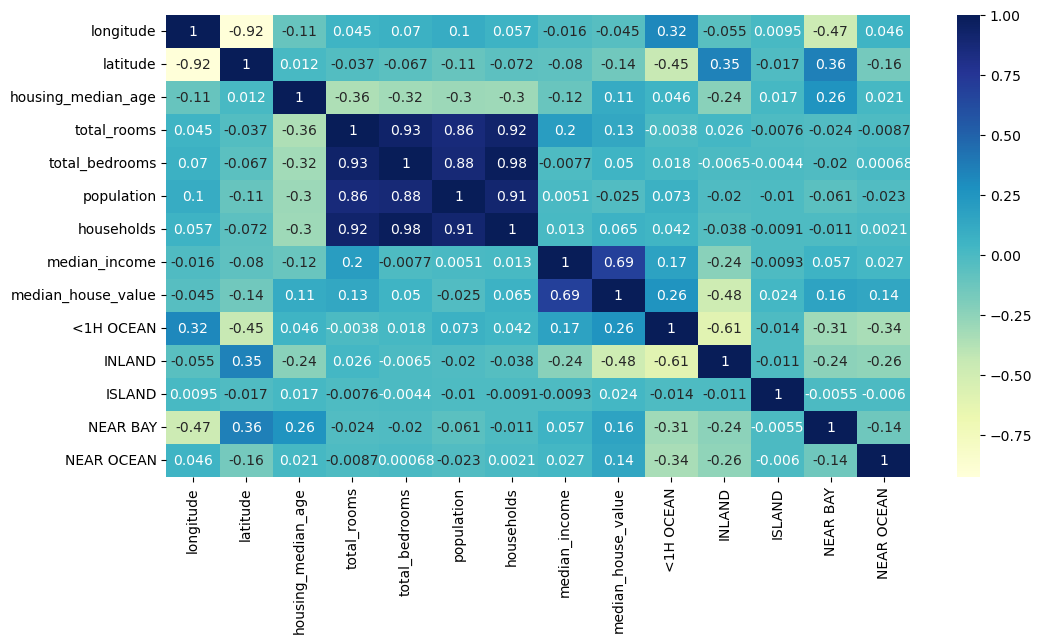

In [218]:
plt.figure(figsize=(12,6))
sns.heatmap(housing.corr(), annot=True, cmap='YlGnBu')


In [219]:
# Separeate the data into features and target columns 
X = housing.drop(['median_house_value'], axis=1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


In [220]:
y = housing['median_house_value']
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [221]:
X.shape, y.shape

((20433, 13), (20433,))

In [222]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [223]:
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [224]:
X[:] = scaler.transform(X)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0,0,0,1,0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0,0,0,1,0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0,0,0,1,0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0,0,0,1,0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0,0,0,1,0


In [225]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [226]:
X_train.shape, X_test.shape

((16346, 13), (4087, 13))

In [227]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,0.253984,0.507970,0.254902,0.112162,0.143234,0.075535,0.146358,0.289844,1,0,0,0,0
2057,0.470120,0.435707,0.627451,0.026298,0.027933,0.017293,0.028449,0.200742,0,1,0,0,0
6453,0.626494,0.167906,0.470588,0.098911,0.131440,0.051711,0.124651,0.218204,0,1,0,0,0
4619,0.601594,0.162593,0.529412,0.060023,0.147114,0.077244,0.146851,0.119757,1,0,0,0,0
15266,0.705179,0.053135,0.509804,0.046722,0.060677,0.036408,0.066272,0.210349,0,0,0,0,1


In [228]:
# Train a Simple linear Regression model 
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [229]:
# Make predictions on the testing set to evaluate performance
# y_preds -predicted for the features
# Compare the predictions to the actual target values in the test set to 
y_pred = model.predict(X_test)


In [230]:
y_test[:5]

14416    245800.0
16383    137900.0
7731     218200.0
1410     220800.0
1335     170500.0
Name: median_house_value, dtype: float64

In [231]:
y_pred[:5]

array([203264., 145408., 208384., 181248., 188928.])

In [232]:
y_pred

array([203264., 145408., 208384., ..., 109056., 137216., 169984.],
      shape=(4087,))

In [233]:
y_pred.shape

(4087,)

In [234]:
# Evalure the performance of the model
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
intercept = model.intercept_

print("R2 Score: ", r2)
print("Mean Squared Error: ", mse) 
print("Mean Absolute Error: ", mae)
print("Intercept: ", intercept) 

R2 Score:  0.64904377338305
Mean Squared Error:  4799389846.976266
Mean Absolute Error:  50476.641546366525
Intercept:  -2.58741982838204e+18


In [235]:
performance = pd.DataFrame({'PREDICTIONS':y_pred, 'ACTUAL VALUES':y_test})
performance['ERROR'] = performance['ACTUAL VALUES'] - performance['PREDICTIONS']
performance.head()

,PREDICTIONS,ACTUAL VALUES,ERROR
14416,203264.0,245800.0,42536.0
16383,145408.0,137900.0,-7508.0
7731,208384.0,218200.0,9816.0
1410,181248.0,220800.0,39552.0
1335,188928.0,170500.0,-18428.0


In [236]:
performance.reset_index(drop=True, inplace=True)
performance.reset_index(inplace=True)
performance.head()

,index,PREDICTIONS,ACTUAL VALUES,ERROR
0,0,203264.0,245800.0,42536.0
1,1,145408.0,137900.0,-7508.0
2,2,208384.0,218200.0,9816.0
3,3,181248.0,220800.0,39552.0
4,4,188928.0,170500.0,-18428.0


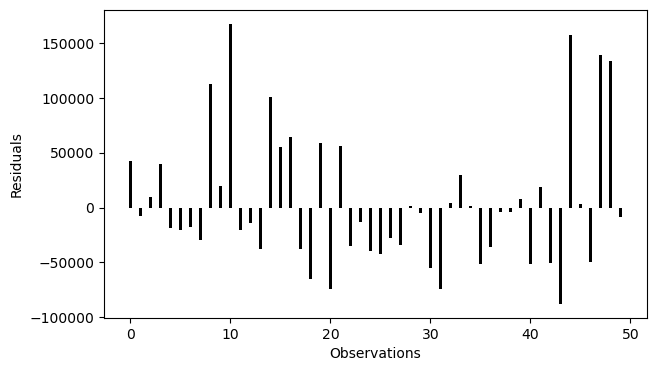

In [237]:
figure = plt.figure(figsize=(7,4))
plt.bar('index', 'ERROR', data=performance[:50], color='black', width=0.3)
plt.xlabel("Observations")
plt.ylabel("Residuals")
plt.show()


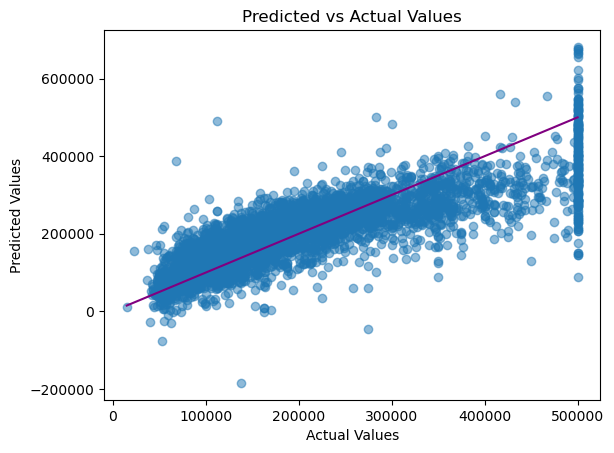

In [238]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="purple")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()